In [1]:
import pandas as pd
import geopandas as gpd
import GOSTnets as gn

In [2]:
%%time
limaamenities = pd.read_csv("LimaAmenities.csv")
gs = gpd.GeoSeries.from_wkt(limaamenities['geometry'])
limaamenities = gpd.GeoDataFrame(limaamenities, geometry=gs).set_index('osmid')
limaamenities.head()

<string>:2: DtypeWarning: Columns (5,6,7,11,12,13,14,16,17,18,19,20,21,23,24,25,26,27,29,30,31,34,43,44,45,46,47,48,49,50,51,52,53,54,55,59,60,61,62,63,64,65,66,67,68,69,70,71,72,74,75,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,103,104,105,106,107,108,109,110,111,112,114,115,116,117,118,119,120,121,122,123,124,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,254,255,256,257,258,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,287,288,289,290,291,292,293,295,296,2

CPU times: user 1.71 s, sys: 383 ms, total: 2.1 s
Wall time: 2.1 s


,unique_id,element_type,amenity,geometry_polygon,fee,wheelchair,wheelchair:description,addr:city,addr:housenumber,addr:street,...,trolleybus,allotments,name:it,wikipedia:en,wikipedia:pl,wikipedia:sv,diesel,shortest_name,isPoint,geometry
osmid,,,,,,,,,,,,,,,,,,,,,
1706421372,node/1706421372,node,bus_station,POINT (-76.90808560000001 -12.2550125),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-76.90809 -12.25501)
1909452321,node/1909452321,node,toilets,POINT (-76.9071656 -12.2558628),no,no,No hay baño para silla de ruedas y encima tien...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-76.90717 -12.25586)
1932465988,node/1932465988,node,townhall,POINT (-76.7734648 -12.4016275),NaN,NaN,NaN,Santa María del Mar,100,El Sardinero,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-76.77346 -12.40163)
2477708419,node/2477708419,node,restaurant,POINT (-76.8284223 -12.3324731),NaN,limited,Tiene baño para silla de ruedas y buena atencion,NaN,NaN,Calle Malecón Norte,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-76.82842 -12.33247)
2477757589,node/2477757589,node,restaurant,POINT (-76.8235383 -12.3382439),NaN,limited,No se si tiene baño para silla de ruedas,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,POINT (-76.82354 -12.33824)


In [3]:
%%time
limanodes = pd.read_csv("LimaNodes.csv")
gs = gpd.GeoSeries.from_wkt(limanodes['geometry'])
limanodes = gpd.GeoDataFrame(limanodes, geometry=gs).set_index('osmid')
limanodes.head()

CPU times: user 2.03 s, sys: 47.2 ms, total: 2.08 s
Wall time: 2.07 s


,y,x,ref,highway,street_count,geometry
osmid,,,,,,
258066779,-12.371160,-76.784901,45A,motorway_junction,3,POINT (-76.78490 -12.37116)
258066780,-12.376522,-76.779354,NaN,NaN,3,POINT (-76.77935 -12.37652)
258066781,-12.384553,-76.771046,NaN,NaN,3,POINT (-76.77105 -12.38455)
258066783,-12.385783,-76.769768,NaN,NaN,3,POINT (-76.76977 -12.38578)
258067237,-12.304254,-76.840727,NaN,NaN,3,POINT (-76.84073 -12.30425)


In [56]:
hospital1 = gpd.read_file('hospital_lima.geojson')
hospital1.drop_duplicates(['osm_id'], inplace=True)
hospital1.set_index('osm_id', inplace=True)
print(hospital1.shape)
hospital1.head()

(158, 32)


,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_full,operator,water_source,changeset_id,insurance,...,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,geometry
osm_id,,,,,,,,,,,,,,,,,,,,,
338350659,way,20.0,,hospital,oncology,,MINSA,,80278687.0,,...,Instituto Nacioanal de Enfermedades Neoplásicas,,CamelCaseNick,,,,,,,"POLYGON ((-76.99985 -12.11232, -76.99984 -12.1..."
6852754574,node,13.0,,hospital,,,Gobierno Regional,,75304307.0,,...,Nac. Daniel A. Carrion,,karitotp_peruimport,,,,,,,POINT (-77.12481 -12.06379)
604765913,way,27.0,,hospital,general,,Municipalidad Metropolitana de Lima,,71603113.0,,...,SISOL Salud Amancaes,,BikeRoad,yes,,,,hospital,,"POLYGON ((-77.03081 -12.01708, -77.03048 -12.0..."
1846294778,node,10.0,,hospital,,,,,16939359.0,,...,Centro de Salud Bahia Blanca,,olgr22,,,,,,,POINT (-77.15870 -11.83530)
431592740,way,24.0,,hospital,general,,ESSALUD,,65456273.0,,...,Hospital III Suarez Angamos,,Diego Sanguinetti,,,,,,,"POLYGON ((-77.02822 -12.11326, -77.02818 -12.1..."


In [9]:
%%time
# amenities_filter = ['bank','casino','clinic','courthouse','hospital','marketplace', 'police','school','university']
var = 'hospital'

cond = limaamenities['amenity'] == var
amenity = limaamenities[cond]
amenity.head()

CPU times: user 20.7 ms, sys: 0 ns, total: 20.7 ms
Wall time: 19.8 ms


,unique_id,element_type,amenity,geometry_polygon,fee,wheelchair,wheelchair:description,addr:city,addr:housenumber,addr:street,...,trolleybus,allotments,name:it,wikipedia:en,wikipedia:pl,wikipedia:sv,diesel,shortest_name,isPoint,geometry
osmid,,,,,,,,,,,,,,,,,,,,,
445599680,way/445599680,way,hospital,"POLYGON ((-76.87692269999999 -12.2103841, -76....",NaN,NaN,NaN,NaN,NaN,Avenida Roque Saenz Peña,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,POINT (-76.87700 -12.21037)
525919060,way/525919060,way,hospital,"POLYGON ((-76.8748204 -12.2433613, -76.8746326...",NaN,NaN,NaN,Lurín,NaN,Jirón Huánuco,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,POINT (-76.87477 -12.24349)
699686753,way/699686753,way,hospital,"POLYGON ((-76.8252367 -12.3267452, -76.8247839...",NaN,yes,NaN,Punta Hermosa,NaN,Avenida Antigua Panamericana Sur,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,POINT (-76.82490 -12.32699)
320125239,way/320125239,way,hospital,"POLYGON ((-76.8200317 -12.0157098, -76.8200729...",NaN,NaN,NaN,NaN,NaN,Avenida José Carlos Mariátegui,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,POINT (-76.82032 -12.01552)
454698428,way/454698428,way,hospital,"POLYGON ((-76.9051638 -12.0284441, -76.9045638...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,POINT (-76.90480 -12.02867)


In [74]:
# hospital1
cols1 = ['osm_type', 'amenity', 'operator', 'name', 'geometry']
hospital1[cols1].head() 
print(hospital1.shape)

cols2 = ['element_type', 'amenity','operator', 'name', 'geometry']
amenity[cols2].head()
print(amenity.shape)

notinhostpital1 = [x for x in amenity.index if x not in hospital1.index  ]

tmp = pd.concat( [ hospital1[cols1], amenity.loc[notinhostpital1][cols2] ] )
print(tmp.shape)
tmp.head()

(158, 32)
(113, 331)
(177, 6)


,osm_type,amenity,operator,name,geometry,element_type
338350659,way,hospital,MINSA,Instituto Nacioanal de Enfermedades Neoplásicas,"POLYGON ((-76.99985 -12.11232, -76.99984 -12.1...",NaN
6852754574,node,hospital,Gobierno Regional,Nac. Daniel A. Carrion,POINT (-77.12481 -12.06379),NaN
604765913,way,hospital,Municipalidad Metropolitana de Lima,SISOL Salud Amancaes,"POLYGON ((-77.03081 -12.01708, -77.03048 -12.0...",NaN
1846294778,node,hospital,,Centro de Salud Bahia Blanca,POINT (-77.15870 -11.83530),NaN
431592740,way,hospital,ESSALUD,Hospital III Suarez Angamos,"POLYGON ((-77.02822 -12.11326, -77.02818 -12.1...",NaN


In [75]:
tmp.reset_index().rename(columns={'index':'osmid'})

,osmid,osm_type,amenity,operator,name,geometry,element_type
0,338350659,way,hospital,MINSA,Instituto Nacioanal de Enfermedades Neoplásicas,"POLYGON ((-76.99985 -12.11232, -76.99984 -12.1...",NaN
1,6852754574,node,hospital,Gobierno Regional,Nac. Daniel A. Carrion,POINT (-77.12481 -12.06379),NaN
2,604765913,way,hospital,Municipalidad Metropolitana de Lima,SISOL Salud Amancaes,"POLYGON ((-77.03081 -12.01708, -77.03048 -12.0...",NaN
3,1846294778,node,hospital,,Centro de Salud Bahia Blanca,POINT (-77.15870 -11.83530),NaN
4,431592740,way,hospital,ESSALUD,Hospital III Suarez Angamos,"POLYGON ((-77.02822 -12.11326, -77.02818 -12.1...",NaN
...,...,...,...,...,...,...,...
172,835415398,NaN,hospital,Municipalidad de La Molina,Centro Médico Municipal Molisalud,POINT (-76.94597 -12.06359),way
173,866156340,NaN,hospital,Policía Nacional del Perú,Hospital Geriátrico San José,POINT (-77.08060 -12.08686),way
174,9721207,NaN,hospital,Municipalidad Metropolitana de Lima,SISOL Salud Carabayllo,POINT (-77.03436 -11.90124),relation
175,9724165,NaN,hospital,Municipalidad Metropolitana de Lima,SISOL Salud Comas,POINT (-77.05728 -11.97065),relation


In [76]:
tmp.reset_index().rename(columns={'index':'osmid'}).to_csv("LimaOSM/HospitalsOSM.csv", index=False)
# tmp.to_csv("HospitalsOSM.csv")

In [65]:
# tmp.geometry.centroid()
tmp['geometry'] = tmp.apply(lambda x: x['geometry'].centroid, axis=1)
tmp.head()

,osm_type,amenity,operator,name,geometry,element_type
338350659,way,hospital,MINSA,Instituto Nacioanal de Enfermedades Neoplásicas,POINT (-76.99853 -12.11259),NaN
6852754574,node,hospital,Gobierno Regional,Nac. Daniel A. Carrion,POINT (-77.12481 -12.06379),NaN
604765913,way,hospital,Municipalidad Metropolitana de Lima,SISOL Salud Amancaes,POINT (-77.03014 -12.01711),NaN
1846294778,node,hospital,,Centro de Salud Bahia Blanca,POINT (-77.15870 -11.83530),NaN
431592740,way,hospital,ESSALUD,Hospital III Suarez Angamos,POINT (-77.02814 -12.11332),NaN


<AxesSubplot:>

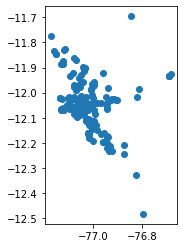

In [62]:
# tmp.loc[[525919060]]
# tmp.shape
tmp.head(1000).plot()

In [66]:
%%time
# pandana = gn.pandana_snap_points( limanodes.head() , amenity.head() )
pandana = gn.pandana_snap_points( limanodes , tmp )

# pandana.head()

/home/leibnitz.rojas/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/leibnitz.rojas/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/home/leibnitz.rojas/.local/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initializatio

CPU times: user 3h 11min 55s, sys: 2min 54s, total: 3h 14min 49s
Wall time: 3h 14min 48s


In [67]:
%%time
# pandana.plot()
amenityid = "{}_osmid".format(var)
amenitydist = "{}_dist".format(var)
amenityid, amenitydist
pandana.rename(columns={'NN':amenityid, 'NN_dist': amenitydist}, inplace=True)
pandana.head()

CPU times: user 1.21 ms, sys: 0 ns, total: 1.21 ms
Wall time: 1.19 ms


,ref,highway,street_count,geometry,hospital_osmid,hospital_dist
osmid,,,,,,
258066779,45A,motorway_junction,3,POINT (-76.78490 -12.37116),699686753,0.059585
258066780,NaN,NaN,3,POINT (-76.77935 -12.37652),699686753,0.067285
258066781,NaN,NaN,3,POINT (-76.77105 -12.38455),699686753,0.078823
258066783,NaN,NaN,3,POINT (-76.76977 -12.38578),699686753,0.080594
258067237,NaN,NaN,3,POINT (-76.84073 -12.30425),699686753,0.027706


In [68]:
%%time
filename = "Lima{}.csv".format(var.capitalize())
filename
pandana.to_csv(filename)


CPU times: user 2.77 s, sys: 16 ms, total: 2.79 s
Wall time: 2.79 s
